## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [2]:
# Read Dataset
dataset = pd.read_excel('Graduate-Admission-2.xlsx')

**Menghapus kolom yang tidak diperlukan**

In [3]:
dataset = dataset.drop(columns=['Serial No.','TOEFL Score','SOP','LOR ','CGPA','Research'],axis=1)

## Informasi Dataset

**Mengecek bagian bawah dataset**

In [4]:
dataset.tail()

,GRE Score,University Rating,Chance of Admit
395,324,3,0.82
396,325,3,0.84
397,330,4,0.91
398,312,3,0.67
399,333,4,0.95


**Menampilkan ukuran dataset**

* Jumlah data 400
* Jumlah header tabel 3

In [5]:
dataset.shape

(400, 3)

**Mengecek apakah dataset terdapat Null**

In [6]:
dataset.isnull().values.any()

False

**Statistik untuk setiap kolom**

In [7]:
dataset.describe()

,GRE Score,University Rating,Chance of Admit
count,400.000000,400.000000,400.000000
mean,316.807500,3.087500,0.724350
std,11.473646,1.143728,0.142609
min,290.000000,1.000000,0.340000
25%,308.000000,2.000000,0.640000
50%,317.000000,3.000000,0.730000
75%,325.000000,4.000000,0.830000
max,340.000000,5.000000,0.970000


**Mengecek kolom**

In [8]:
dataset.columns

Index(['GRE Score', 'University Rating', 'Chance of Admit'], dtype='object')

**Mengetahui Korelasi antar variabel**

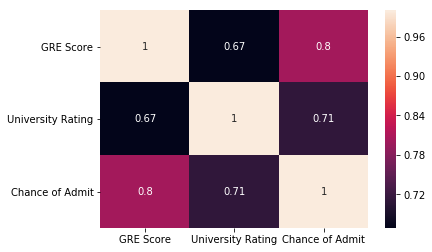

In [9]:
sns.heatmap(dataset.corr(),annot=True)

## Data Test dan Data Training

**Membuat variabel X dan y**

In [10]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

**Membagi data menjadi data train dan data test**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Mengecek berapa banyak data test dan data train**

In [12]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (320, 2)
y_train:  (320,)
X_test:  (80, 2)
y_test:  (80,)


## Training Model

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Persamaan Regresi Linear

In [37]:
coeff_df = pd.DataFrame(reg.coef_,X.columns, columns=['Koefisien'])
coeff_df

,Koefisien
GRE Score,0.007849
University Rating,0.034812


**Mengecek Nilai Konstanta (A) dan Koefisien regresi (bi)**

In [38]:
b1,b2 = zip(reg.coef_)

print('b1 :', str('%.2f' % b1))
print('b2 :', str('%.2f' % b2))
print('A  : ', reg.intercept_)

b1 : 0.01
b2 : 0.03
A  :  -1.8683437887796277


In [47]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + ' * X1',' + '+ str('%.2f' % reg.coef_[1]) + ' * X2 ')

y = -1.87 + 0.01 * X1  + 0.03 * X2 


## Prediksi Model

In [49]:
y_pred = reg.predict(X_test)

**Visualisasi Prediksi**

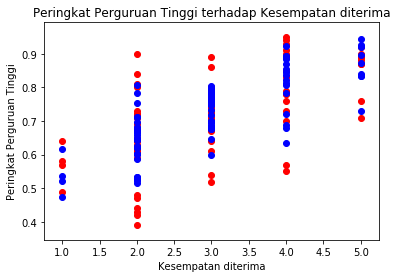

In [50]:
plt.scatter(X_test['University Rating'], y_test, color='red')
plt.scatter(X_test['University Rating'], y_pred, color='blue')
plt.xlabel('Kesempatan diterima')
plt.ylabel('Peringkat Perguruan Tinggi')
plt.title('Peringkat Perguruan Tinggi terhadap Kesempatan diterima');

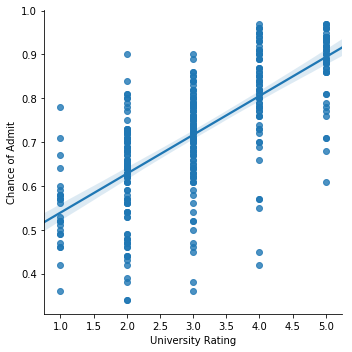

In [19]:
sns.lmplot(x='University Rating',y='Chance of Admit',data=dataset)

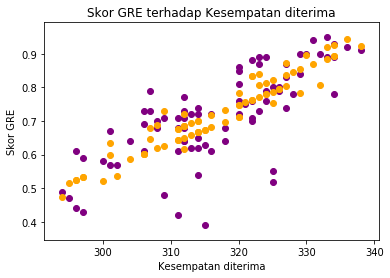

In [58]:
plt.scatter(X_test['GRE Score'], y_test, color='purple')
plt.scatter(X_test['GRE Score'], y_pred, color='orange')
plt.xlabel('Kesempatan diterima')
plt.ylabel('Skor GRE')
plt.title('Skor GRE terhadap Kesempatan diterima');

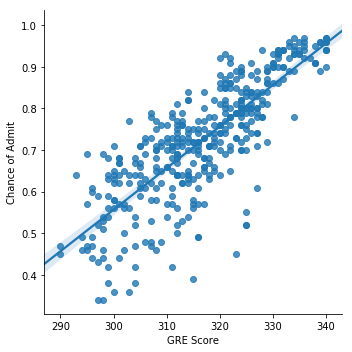

In [53]:
sns.lmplot(x='GRE Score',y='Chance of Admit',data=dataset)

## Evaluasi Model

**3 Metode untuk mengurangi error**

In [22]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.06044564828738065
Mean Squared Error (MSE): 0.006787999820450951
Root Mean Squared Error (RMSE): 0.08238931860654602


## Membandingkan Real dan Prediksi GRE Score dan Peringkat Perguruan Tinggi

In [69]:
y_pred1 = pd.DataFrame(y_pred, columns=['GRE Score'])

y_pred2 = pd.DataFrame(y_pred, columns=['University Rating'])

y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)

ynew = pd.concat([y_pred1,  y_pred2, y_test1], axis=1)
ynew

,GRE Score,University Rating,Chance of Admit
0,0.731006,0.731006,0.71
1,0.688345,0.688345,0.70
2,0.794811,0.794811,0.79
3,0.603023,0.603023,0.73
4,0.716323,0.716323,0.72
...,...,...,...
75,0.677079,0.677079,0.61
76,0.603023,0.603023,0.69
77,0.657964,0.657964,0.62
78,0.892414,0.892414,0.93


In [24]:
#print('Akurasi Model : ',reg.score(X_test, y_test))

**Koefisien Determinasi**

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print('r2 : ', r2_score(y_test, y_pred))

r2 :  0.6483331551042085
